In [1]:
import pyvista as pv
grid = pv.UnstructuredGrid()

In [2]:
import pyvista as pv
from pyvista import examples

grid = pv.UnstructuredGrid(examples.hexbeamfile)
grid

UnstructuredGrid (0x7f7c073cabb0)
  N Cells:	40
  N Points:	99
  X Bounds:	0.000e+00, 1.000e+00
  Y Bounds:	0.000e+00, 1.000e+00
  Z Bounds:	0.000e+00, 5.000e+00
  N Arrays:	3

In [3]:
import pyvista as pv
grid = pv.StructuredGrid()

In [4]:
import pyvista
pv.OFF_SCREEN = True
pyvista.set_jupyter_backend('panel')
pyvista.set_plot_theme('document')

In [5]:
import pyvista as pv
import numpy as np

x = np.arange(-10, 10, 0.25)
y = np.arange(-10, 10, 0.25)
z = np.arange(-10, 10, 0.25)
x, y, z = np.meshgrid(x, y, z)

# create the unstructured grid directly from the numpy arrays and plot
grid = pv.StructuredGrid(x, y, z)
grid.plot(show_edges=True)

In [6]:
# Load module and example file
import pyvista as pv
from pyvista import examples
import numpy as np

# Load example beam grid
grid = pv.UnstructuredGrid(examples.hexbeamfile)

# Create fictitious displacements as a function of Z location
d = np.zeros_like(grid.points)
d[:, 1] = grid.points[:, 2]**3/250

# Displace original grid
grid.points += d

In [7]:
grid.plot(scalars=d[:, 1], scalar_bar_args={'title': 'Y Displacement'})

In [8]:
# Store Camera position.  This can be obtained manually by getting the
# output of grid.plot()
# it's hard-coded in this example
cpos = [(11.915126303095157, 6.11392754955802, 3.6124956735471914),
        (0.0, 0.375, 2.0),
        (-0.42546442225230097, 0.9024244135964158, -0.06789847673314177)]

# plot this displaced beam
plotter = pv.Plotter()
plotter.add_mesh(grid, scalars=d[:, 1],
                 scalar_bar_args={'title': 'Y Displacement'},
                 rng=[-d.max(), d.max()])
plotter.add_axes()
plotter.camera_position = cpos

plotter.show()

In [9]:
plotter = pv.Plotter(window_size=(800, 600))
plotter.add_mesh(grid, scalars=d[:, 1],
                 scalar_bar_args={'title': 'Y Displacement'},
                 show_edges=True, rng=[-d.max(), d.max()],
                 interpolate_before_map=True)
plotter.add_axes()
plotter.camera_position = cpos

In [10]:
# open movie file.  A mp4 file can be written instead.  Requires moviepy
plotter.open_gif('beam.gif')  # or beam.mp4

# Modify position of the beam cyclically
pts = grid.points.copy()  # unmodified points
for phase in np.linspace(0, 2*np.pi, 20):
    plotter.update_coordinates(pts + d*np.cos(phase))
    plotter.update_scalars(d[:, 1]*np.cos(phase))
    plotter.write_frame()

# Close the movie and plot
plotter.close()

In [11]:
# move to the right location
# note that this will be executed relative to pyvista/docs
import shutil
import os
shutil.move('beam.gif',
            os.path.join(os.getcwd(), './images/auto-generated/beam.gif'))

'/home/runner/work/pyvista-doc-translations/pyvista-doc-translations/locale/./images/auto-generated/beam.gif'

In [12]:
# Animate plot as a wire-frame
plotter = pv.Plotter(window_size=(800, 600))
plotter.add_mesh(grid, scalars=d[:, 1],
                 scalar_bar_args={'title': 'Y Displacement'},
                 show_edges=True,
                 rng=[-d.max(), d.max()], interpolate_before_map=True,
                 style='wireframe')
plotter.add_axes()
plotter.camera_position = cpos

#plotter.OpenMovie('beam_wireframe.mp4')
plotter.open_gif('beam_wireframe.gif')
for phase in np.linspace(0, 2*np.pi, 20):
    plotter.update_coordinates(grid.points + d*np.cos(phase), render=False)
    plotter.update_scalars(d[:, 1]*np.cos(phase), render=False)
    plotter.render()
    plotter.write_frame()

plotter.close()

In [13]:
# move to the right location
# note that this will be executed relative to pyvista/docs
import shutil
import os
shutil.move('beam_wireframe.gif',
             os.path.join(os.getcwd(), './images/auto-generated/beam_wireframe.gif'))

'/home/runner/work/pyvista-doc-translations/pyvista-doc-translations/locale/./images/auto-generated/beam_wireframe.gif'

In [14]:
# labels to not show in panel
pyvista.set_jupyter_backend('static')

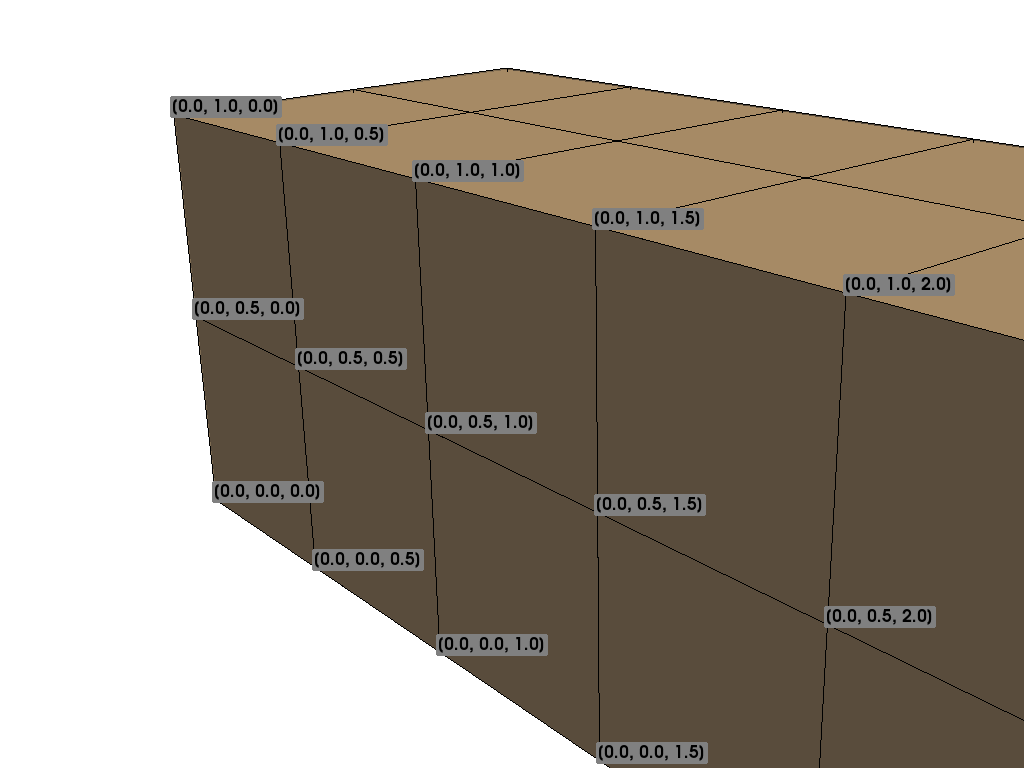

In [15]:
# Load module and example file
import pyvista as pv
from pyvista import examples

# Load example beam file
grid = pv.UnstructuredGrid(examples.hexbeamfile)

# Create plotting class and add the unstructured grid
plotter = pv.Plotter()
plotter.add_mesh(grid, show_edges=True, color='tan')

# Add labels to points on the yz plane (where x == 0)
points = grid.points
mask = points[:, 0] == 0
plotter.add_point_labels(points[mask], points[mask].tolist())

plotter.camera_position = [
                (-1.4643015810492384, 1.5603923627830638, 3.16318236536270),
                (0.05268120500967251, 0.639442034364944, 1.204095304165153),
                (0.2364061044392675, 0.9369426029156169, -0.25739213784721)]

plotter.show()

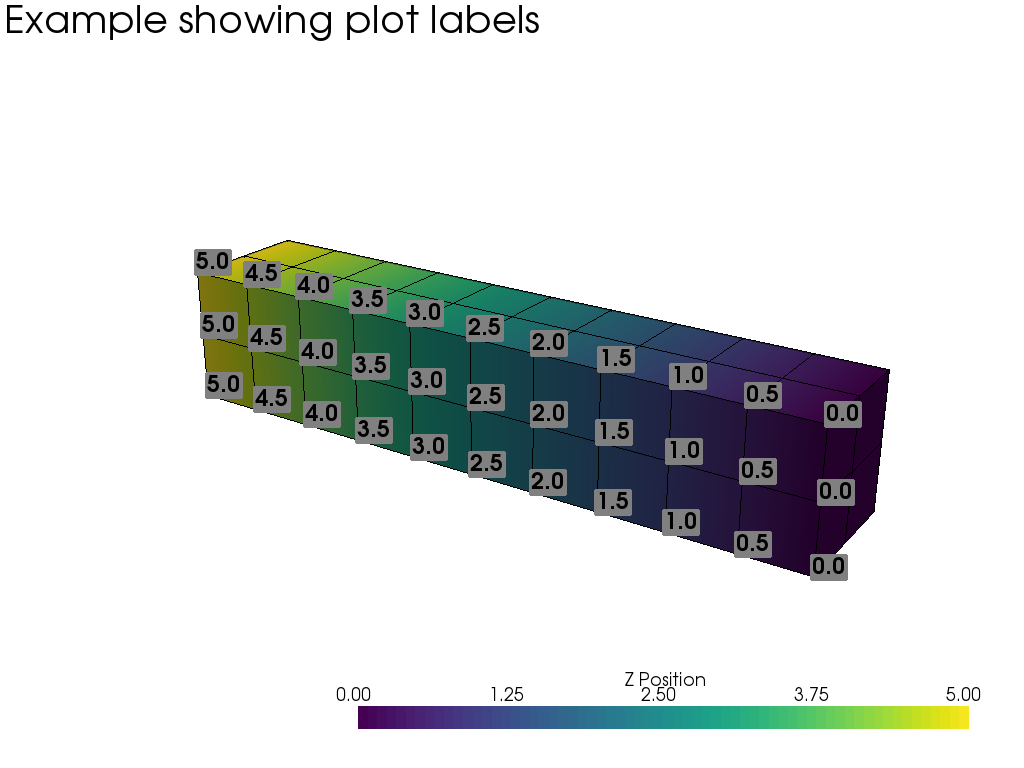

In [16]:
# Label the Z position
values = grid.points[:, 2]

# Create plotting class and add the unstructured grid
plotter = pv.Plotter()
# color mesh according to z value
plotter.add_mesh(grid, scalars=values,
                 scalar_bar_args={'title': 'Z Position'},
                 show_edges=True)

# Add labels to points on the yz plane (where x == 0)
mask = grid.points[:, 0] == 0
plotter.add_point_labels(points[mask], values[mask].tolist(), font_size=24)

# add some text to the plot
plotter.add_text('Example showing plot labels')

plotter.view_vector((-6, -3, -4), (0.,-1., 0.))
plotter.show()